In [4]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
cwd = os.getcwd()
print (cwd)

def print_typeshape(img):
    print ("Type is %s" % (type(img)))
    print ("Shape is %s" % (img.shape,))

# Load
cat = imread(cwd + '/data/cat1.jpg')
print_typeshape(cat)

# Plot
plt.figure(0)
plt.imshow(cat)
plt.title("My favorite")
plt.draw()

/Users/noah/Documents/study/lecture/edwith


In [9]:
# draw astype(np.float)
cat2 = imread(cwd + '/data/cat1.jpg').astype(np.float)
print_typeshape(cat2)

plt.figure(0)
plt.imshow(cat2)
plt.title("np.float type")
plt.draw()

plt.figure(0)
plt.imshow(cat2/255.)
plt.title('divide by 255.')
plt.draw()

Type is <class 'numpy.ndarray'>
Shape is (539, 1280, 3)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


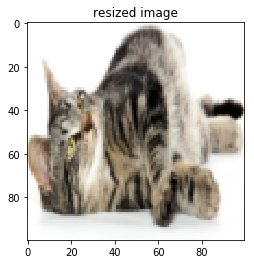

In [18]:
# Resize
catsmall = imresize(cat, [100,100,3])
print_typeshape(catsmall)

plt.figure(1)
plt.imshow(catsmall)
plt.title("resized image")
plt.draw()

Type is <class 'numpy.ndarray'>
Shape is (100, 100)


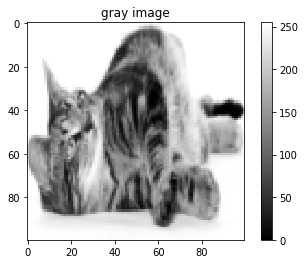

In [35]:
# Gray scale
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("current image is GRAY")
        return rgb
catsmallgray = rgb2gray(catsmall)

print_typeshape(catsmallgray)

plt.figure(2)
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("gray image")
plt.colorbar()
plt.draw()

In [38]:
# Convert to Vector
catrowvec = np.reshape(catsmallgray, (1,-1))
print_typeshape(catrowvec)

# Convert to Matrix
catmatrix = np.reshape(catrowvec, (100,-1))
print_typeshape(catmatrix)

Type is <class 'numpy.ndarray'>
Shape is (1, 10000)
Type is <class 'numpy.ndarray'>
Shape is (100, 100)


In [43]:
# Load from Folder
cwd = os.getcwd()
path = cwd + "/data/"
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg"]

print ("{} files in {}".format(len(os.listdir(path)), path))

# append images and their names to lists
imgs = []
names = []
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))
    names.append(f)
print ("{} images loaded".format(len(imgs)))

4 files in /Users/noah/Documents/study/lecture/edwith/data/
4 images loaded


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


In [56]:
# check
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i in zip([imgs[j] for j in randidx], [names[j] for j in randidx],
                                 range(len(randidx))):
    print ("[{}] Type : {}".format(i, type(curr_img)))
    print ("    Name : {}".format(curr_name))
    print ("    Size : {}".format(curr_img.shape,))

[0] Type : <class 'numpy.ndarray'>
    Name : dog1.jpg
    Size : (720, 1280, 3)
[1] Type : <class 'numpy.ndarray'>
    Name : s660.jpg
    Size : (493, 800, 3)
[2] Type : <class 'numpy.ndarray'>
    Name : s660.jpg
    Size : (493, 800, 3)


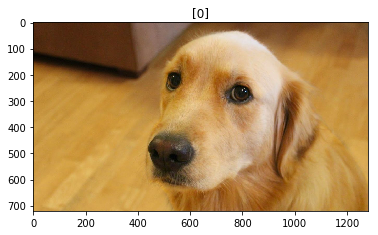

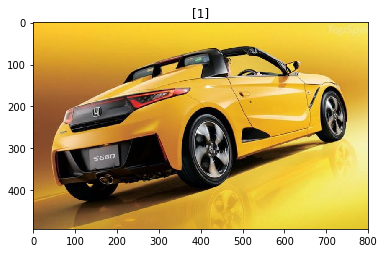

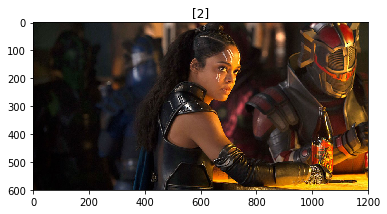

In [58]:
# plot images in 'imgs' list
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i in zip([imgs[j] for j in randidx], [names[j] for j in randidx],
                                 range(len(randidx))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "]")
    plt.draw()